In [63]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

ZYAM Index Range = 6 to 8
[12.0, 40.0]
H_Purities_pT12_40
['../InputData/pT_Rebin_1_16dPhi/pp_SE_L0_Correlation_GMB_Ratio.root', '../InputData/pT_Rebin_1_16dPhi/pPb_SE_L0_Correlation_GMB_Ratio.root']


In [64]:
print(N_dPhi_Bins)
print(dPhi_Bins)
for dphi in dPhi_Bins:
    print("%1.4f"%(dphi)),
print("")
print(len(delta_phi_centers))
print(delta_phi_centers)
print("UE points")
print(ue_error_bar)
print(dPhi_Bins[(len(dPhi_Bins)-N_Phi_Integrate):])
print(Integration_Width)

16
[0.0, 0.19634954084936207, 0.39269908169872414, 0.5890486225480862, 0.7853981633974483, 0.9817477042468103, 1.1780972450961724, 1.3744467859455345, 1.5707963267948966, 1.7671458676442586, 1.9634954084936207, 2.1598449493429825, 2.356194490192345, 2.552544031041707, 2.748893571891069, 2.945243112740431, 3.141592653589793]
0.0000 0.1963 0.3927 0.5890 0.7854 0.9817 1.1781 1.3744 1.5708 1.7671 1.9635 2.1598 2.3562 2.5525 2.7489 2.9452 3.1416 
16
[0.09817477042468103, 0.2945243112740431, 0.4908738521234052, 0.6872233929727672, 0.8835729338221293, 1.0799224746714913, 1.2762720155208536, 1.4726215563702154, 1.6689710972195777, 1.8653206380689396, 2.061670178918302, 2.2580197197676637, 2.454369260617026, 2.6507188014663883, 2.84706834231575, 3.043417883165112]
UE points
[0.39269908169872414, 0.7853981633974483]
[2.1598449493429825, 2.356194490192345, 2.552544031041707, 2.748893571891069, 2.945243112740431, 3.141592653589793]
1.10879740715


In [65]:
Corrs = ROOT_to_nparray()

In [66]:
reload(functions_root_nparray)
from functions_root_nparray import *

In [67]:
print_from_Dict(Corrs)
#Plot_UB()

pp_CSR:
0.4595 0.4623 0.4200 0.4023 0.4128 0.3903 0.3712 0.3832 0.4077 0.4212 0.4495 0.4467 0.4820 0.5170 0.5956 0.5980 
0.3596 0.3175 0.2772 0.2710 0.2412 0.2553 0.2615 0.2688 0.2779 0.2794 0.3067 0.3215 0.3423 0.3895 0.4291 0.4629 
0.1932 0.1642 0.1441 0.1266 0.1267 0.1162 0.1191 0.1190 0.1284 0.1447 0.1502 0.1667 0.1882 0.2576 0.2775 0.2927 
0.0730 0.0562 0.0585 0.0423 0.0486 0.0469 0.0377 0.0585 0.0519 0.0488 0.0625 0.0669 0.0928 0.1149 0.1500 0.1749 
0.0187 0.0179 0.0232 0.0135 0.0144 0.0132 0.0157 0.0144 0.0189 0.0188 0.0220 0.0284 0.0379 0.0567 0.0762 0.0911 
0.0044 0.0048 0.0051 0.0048 0.0055 0.0041 0.0045 0.0039 0.0063 0.0078 0.0070 0.0079 0.0111 0.0160 0.0285 0.0402 
0.0005 0.0013 0.0007 0.0006 0.0009 0.0006 0.0012 0.0018 0.0004 0.0014 0.0015 0.0027 0.0033 0.0057 0.0070 0.0107 

pp_CBR:
0.4117 0.3666 0.3405 0.3192 0.3025 0.2915 0.2858 0.2964 0.3120 0.3184 0.3301 0.3466 0.3698 0.4014 0.4419 0.4582 
0.3091 0.2633 0.2343 0.2005 0.1933 0.1919 0.1928 0.2006 0.2076 0.2115 0.2190 0.

In [68]:
reload(functions_correlations)
from functions_correlations import *

In [69]:
Show_Plots = False

Correlated_Subtraction_Weights(Corrs)
print("-------------- After Correlated Subtraction -----------")
print_from_Dict(Corrs)

if (Show_Plots):
    Plot_UB_Subtraction(Corrs)

Ped_Sub_After_Cs(Corrs)
print("-------------- After Pedestal Subtraction -----------")
print_from_Dict(Corrs)

if (Show_Plots):
    Plot_pp_pPb_Cs(Corrs)

-------------- After Correlated Subtraction -----------
pp_CSR:
0.0478 0.0957 0.0796 0.0831 0.1103 0.0988 0.0854 0.0868 0.0957 0.1029 0.1194 0.1001 0.1123 0.1156 0.1537 0.1397 
0.0505 0.0542 0.0429 0.0705 0.0479 0.0633 0.0687 0.0682 0.0703 0.0679 0.0877 0.0870 0.0740 0.0960 0.0937 0.1122 
0.0164 0.0376 0.0231 0.0283 0.0336 0.0252 0.0271 0.0206 0.0277 0.0343 0.0301 0.0347 0.0368 0.0809 0.0593 0.0491 
0.0105 0.0098 0.0135 0.0054 0.0127 0.0074 0.0023 0.0199 0.0111 0.0032 0.0129 0.0092 0.0236 0.0249 0.0356 0.0282 
0.0018 0.0057 0.0089 0.0014 0.0043 0.0005 0.0039 0.0021 0.0043 0.0027 0.0003 0.0065 0.0091 0.0171 0.0175 0.0166 
0.0008 0.0014 0.0012 0.0018 0.0029 -0.0009 -0.0004 0.0002 0.0022 0.0026 0.0003 0.0008 0.0017 0.0015 0.0053 0.0068 
0.0001 0.0006 -0.0001 -0.0001 0.0003 -0.0003 0.0002 0.0008 -0.0012 -0.0001 0.0003 0.0012 0.0013 0.0027 0.0012 0.0006 

pp_CBR:
0.4117 0.3666 0.3405 0.3192 0.3025 0.2915 0.2858 0.2964 0.3120 0.3184 0.3301 0.3466 0.3698 0.4014 0.4419 0.4582 
0.3091 0.2633 0.

$C_S = \frac{C_{SR} - (1-p) C_{BR}}{p}$

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

In [70]:
Frags = Get_Fragmentation(Corrs)
print_from_Dict(Frags)

pp_FF:
8.39714578582 3.40889968516 2.35192611851 0.703381963016 0.330458476286 0.0748709050627 0.0122058879078 



## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}w_i x_i}{\sum_{i=1}^{n}w_i}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [72]:
Combined_Frags = Average_FF(Frags)
print(Combined_Frags)

{'pp_Combined_FF_Errors': array([ 1.23897643,  0.68165169,  0.34330874,  0.15524736,  0.07220577,
        0.02561812,  0.00862289]), 'p-Pb_purity_Uncertainty': array([ 1.77685704,  1.07719964,  0.51990898,  0.1521786 ,  0.05451156,
        0.01613405,  0.00194621]), 'p-Pb_Combined_FF': array([ 10.8758358 ,   6.59335344,   3.18227327,   0.93145902,
         0.33365585,   0.09875375,   0.0119124 ]), 'pp_Combined_FF': array([ 8.39714579,  3.40889969,  2.35192612,  0.70338196,  0.33045848,
        0.07487091,  0.01220589]), 'pp_purity_Uncertainty': array([ 1.3718971 ,  0.55693443,  0.38424968,  0.11491615,  0.05398918,
        0.01223215,  0.00199416]), 'p-Pb_Combined_FF_Errors': array([ 1.44239509,  0.79904655,  0.37981348,  0.15906627,  0.06211615,
        0.02283951,  0.00652546])}


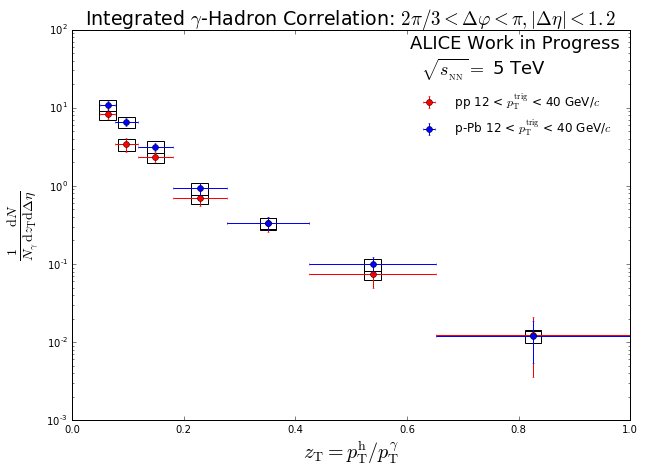

                    pp Central Values:
[ 8.39714579  3.40889969  2.35192612  0.70338196  0.33045848  0.07487091
  0.01220589]

                    pp Stat. Uncertainty:
[ 1.23897643  0.68165169  0.34330874  0.15524736  0.07220577  0.02561812
  0.00862289]

                    p-Pb Central Values:
[ 10.8758358    6.59335344   3.18227327   0.93145902   0.33365585
   0.09875375   0.0119124 ]

                    p-Pb Stat. Uncertainty:
[ 1.44239509  0.79904655  0.37981348  0.15906627  0.06211615  0.02283951
  0.00652546]

                        LaTeX Table
Source   &  pp data & \pPb~data  \\
Statistical Uncertainty & 15\%-71\% & 12\%-55\% \\
\hline
Purity & 16\%-16\% & 16\%-16\% \\
Tracking Efficiency &  5\% & 5\%  \\ 


In [59]:
Plot_pp_pPb_Avg_FF(Combined_Frags)

In [60]:
reload(functions_fragmentation)
from functions_fragmentation import *

[ 0.32280801  0.27741958  0.24450004  0.22947976  0.23580434  0.26193216
  0.30277923  0.35327625  0.40987193  0.47036999  0.53344437  0.59828079
  0.66436356  0.73135493  0.79902638  0.86721873  0.93581811  1.00474115
  1.07392554  1.14332383]


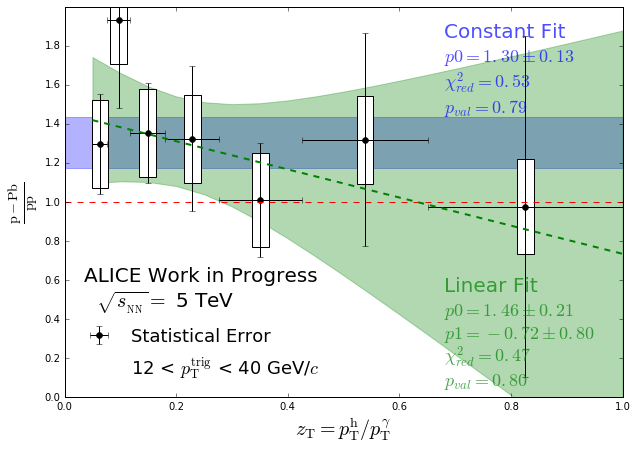

                Central Values:
[ 1.29518244  1.93415883  1.35304985  1.32425776  1.00967556  1.31898697
  0.97595493]

                Ratio Uncertainty from Purity:
[ 0.20640653  0.183921    0.20315445  0.2047257   0.22994501  0.20502317
  0.23391295]

                Ratio Uncertainty from Single Track Efficiency:
[ 0.09158323  0.13676568  0.09567507  0.09363916  0.07139484  0.09326646
  0.06901043]

                Full Systematic Uncertainty:
[ 0.22581219  0.22919814  0.22455612  0.2251242   0.24077361  0.22524017
  0.24388052]

****************************************
Minimizer is Linear
Chi2                      =      3.15605
NDf                       =            6
p0                        =      1.30341   +/-   0.129849    

****************************************
Minimizer is Linear
Chi2                      =      2.35357
NDf                       =            5
p0                        =        1.455   +/-   0.213297    
p1                        =    -0.720548   +/-   

In [61]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

## Compare Trigger pT Bins

In [ ]:
reload(functions_correlations)
from functions_correlations import *

In [ ]:
Plot_FF(Frags)

In [ ]:
reload(functions_fragmentation)
from functions_fragmentation import *

In [ ]:
FF_Ratio(Frags)

In [ ]:
Overlay_pT_FF(Frags)

## Compare Purity Deviations

## Compare Track Cuts

In [38]:
strings = ["05zT","05zT_3bins","05zT_2bins","1zT"]
string_descriptions = ["$p_{T}^\mathrm{Track}\ \mathrm{Cut} = 0.5\ \mathrm{GeV}/c$",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st & 2nd $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 1.0\ \mathrm{GeV}/c$"]
colors = ["green","red","blue","orange"]
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

AttributeError: 'module' object has no attribute 'geomspace'

In [ ]:
strings = ["1zT","05zT","05zT_working_old"]
string_descriptions = ["Track pT cut = 0.5 GeV/c", "Track pT cut = 1.0 GeV/c","ALICE-USA 0.5 GeV/c"]
colors = ["cyan","red","blue"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

## Compare Trigger Photon pT Binning (3,4,& 5 Bins)

In [ ]:
strings = ["pT_Rebin_3","pT_Rebin_4","pT_Rebin_5","pT_Rebin_1"]
string_descriptions = ["3 Trigger pT Bins", "4 Trigger pT Bins","5 Trigger pT Bins","1 Trigger pT Bins"]
colors = ["lightgreen","magenta","orange","cyan"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [ ]:
strings = ["pT_Rebin_3_Cut","pT_Rebin_4_Cut","pT_Rebin_5_Cut"]
string_descriptions = ["3 Trigger pT Bins", "4 Trigger pT Bins","5 Trigger pT Bins"]
colors = ["lightgreen","magenta","orange"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

## Compare ZT Binning (6,7, & 8)

In [ ]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

In [ ]:
strings = ["zT_Rebin_6","05zT","zT_Rebin_8","zT_Rebin_9","zT_Rebin_15"]
string_descriptions = ["6 zT Bins", "7 zT Bins", "8 zT Bins","9 zT Bins","15 zT Bins"]
colors = ["cyan","red","blue","lightgreen","orange"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [ ]:
strings = ["dPhi_Rebin_16","pT_Rebin_4"]
string_descriptions = ["8 dPhi Bins", "16 dPhi Bins"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [ ]:
strings = ["pT_Rebin_4","pT_Rebin_4_Cut"]
string_descriptions = ["12-40 GeV", "15-40 GeV"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [ ]:
strings = ["pT_Rebin_4_Weights","pT_Rebin_3_Weights"]
string_descriptions = ["4 pT Bins", "3 pT Bins"]
colors = ["purple","darkblue"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [ ]:
strings = ["pT_Rebin_4_Weights","pT_Rebin_3_Weights","pT_Rebin_5_Weights","pT_Rebin_1"]
string_descriptions = ["4 pT Bins", "3 pT Bins","5 pT Bins","1 pT Bin"]
colors = ["purple","darkblue","red","cyan"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [ ]:
strings = ["pT_Rebin_4_Weights","pT_Rebin_4_ErrWeights"]
string_descriptions = ["pol4", "Err"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [ ]:
strings = ["pT_Rebin_4","pT_Rebin_4_Lambda"]
string_descriptions = ["Lambda = 0.4", "Lambda = 0.3"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [ ]:
strings = ["pT_Rebin_4","pT_Rebin_4_Lambda"]
string_descriptions = ["Lambda = 0.4", "Lambda = 0.3"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [ ]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

In [ ]:
strings = ["pT_Rebin_1","pT_Rebin_1_16dPhi"]
string_descriptions = ["8 dPhi", "16 dPhi"]
colors = ["cyan","red"]
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [ ]:
strings = ["pT_Rebin_3_ErrWeights","pT_Rebin_4_ErrWeights","pT_Rebin_5_ErrWeights"]
string_descriptions = ["3 pT Bins", "4 pT Bins","5 pT Bins"]
colors = ["purple","darkblue","red",]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [ ]:
print(pTbins)